## Table 2: Working Hour Preferences of Full-Time Employed Australians

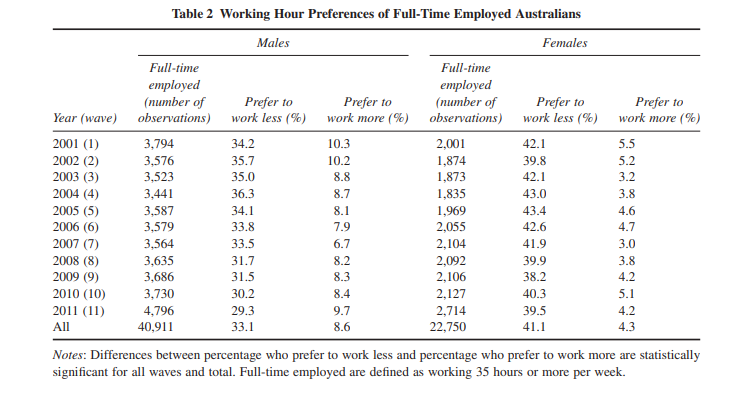

In [1]:
import pandas as pd
import numpy as np
from glob import glob

In [2]:
filenames = glob('Combined_*[a,b,c,d,e,f,g,h,i,j,k]*160c.dta')
list_dfs  = [pd.read_stata(f) for f in filenames]

In [62]:
waves_jbhr_index = [list_dfs[i].filter(regex='jbhrcpr$').columns for i in range(11)] #This finds the index for the string 'jbhrcpr' in all waves
waves_jbhr = [list_dfs[i][waves_jbhr_index[i]] for i in range(11)] #waves_jbhr[0-10] are now created (waves1-11)
waves_sex_index = [list_dfs[i].filter(regex='hgsex$').columns for i in range(11)] #Finds the index for sex in each dataset
waves_sex = [list_dfs[i][waves_sex_index[i]] for i in range(11)] #waves_sex[0-10] are now created (waves1-11)

waves_employed_index = [list_dfs[i].filter(regex='esdtl$').columns for i in range(11)] #
waves_employed = [list_dfs[i][waves_employed_index[i]] for i in range(11)] #waves_employed[0-10] are now created (waves1-11)

In [63]:
waves_join = [waves_jbhr[i].join([waves_sex[i],waves_employed[i]]) for i in range(11)] #This joins the columns of jbhr and sex for each data

In [64]:
waves_excluded = [waves_join[i][waves_join[i].iloc[:,2] == '[1] Employed FT'] for i in range(11)]
waves_excluded = [waves_excluded[i].iloc[:,:2] for i in range(11)]
waves = [waves_excluded[i].groupby([waves_excluded[i].iloc[:,0],waves_excluded[i].iloc[:,1]]).size().unstack() for i in range(11)]
waves = [waves[i].T for i in range(11)]


In [65]:
total = [waves[i].sum(axis=1) for i in range(11)]
total_df = [pd.DataFrame(total[i]) for i in range(11)]
total_combine = [total_df[i].join(waves[i]) for i in range(11)]
frac_waves = [waves[i].div(waves[i].sum(axis=1), axis=0) * 100 for i in range(11)]

In [66]:
total_combine = [total_df[i].join(frac_waves[i]) for i in range(11)]
total_combine = [total_combine[i].rename(columns={0:'Employed Full-Time'}) for i in range(11)]
total_combine = [total_combine[i].fillna(0) for i in range(11)]

In [67]:
final_table = total_combine[0].merge(total_combine[1], how = 'outer')
final_table = final_table.merge(total_combine[2], how = 'outer')
final_table = final_table.merge(total_combine[3], how = 'outer')
final_table = final_table.merge(total_combine[4], how = 'outer')
final_table = final_table.merge(total_combine[5], how = 'outer')
final_table = final_table.merge(total_combine[6], how = 'outer')
final_table = final_table.merge(total_combine[7], how = 'outer')
final_table = final_table.merge(total_combine[8], how = 'outer')
final_table = final_table.merge(total_combine[9], how = 'outer')
final_table = final_table.merge(total_combine[10], how = 'outer')

In [68]:
final_table = final_table.fillna('')
row_list = final_table.index
num_rows = len(row_list)

In [69]:
new_rows = []
for i in range(num_rows):
    if i == 0 or i %2 == 0:
        new_rows.append('Male')
    else:
        new_rows.append('Female')

In [70]:
wave_name = []
for i in range(1,12):
    if i == 0 or i %2 == 0:
        wave_name.append('Wave {}'.format(i))
        wave_name.append('Wave {}'.format(i))
    else:
        wave_name.append('Wave {}'.format(i))
        wave_name.append('Wave {}'.format(i))

In [71]:
final_rows = [wave_name[i] + ' ' + new_rows[i] for i in range(22)]
final_table.index = new_rows

In [72]:
a = 0
b = 2
final_locs = []
while a < 21:
    final_locs.append(final_table.iloc[a:b,:])
    a = a + 2
    b = b + 2

In [73]:
final_table = final_table.reset_index()
final_table.index = wave_name
final_table = final_table.rename(columns={'index':'Sex'})

In [74]:
final_table

,Sex,Employed Full-Time,[-4] Refused/Not stated,[-3] Dont know,[1] Fewer hours,[2] About the same,[3] More hours
Wave 1,Male,3797.0,0.0263366,0.263366,34.922307,55.043455,9.744535
Wave 1,Female,2001.0,0,0.149925,43.328336,51.374313,5.147426
Wave 2,Male,3575.0,,0.139860,36.811189,54.097902,8.951049
Wave 2,Female,1873.0,,0.213561,41.003737,54.030966,4.751735
Wave 3,Male,3524.0,,0.170261,36.634506,55.675369,7.519864
Wave 3,Female,1873.0,,0.213561,41.324079,55.258943,3.203417
Wave 4,Male,3441.0,0.0290613,0.232491,36.094159,55.710549,7.933740
Wave 4,Female,1836.0,0,0.054466,43.082789,53.267974,3.594771
Wave 5,Male,3587.0,,0.111514,34.652913,57.178701,8.056872
Wave 5,Female,1970.0,,0.050761,43.451777,52.284264,4.213198
